In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

import os
print(os.listdir("../"))



['dataset_abstract.docx', 'Parkinson_draw_googlecolab', 'Parkinson_MLDL']


In [4]:
new_data=pd.read_csv('ML_Parkinson_son_dataset.csv')

In [6]:
new_data.head(5)

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,Class
0,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,195.252,193.289,14.773,159.515,234.505,170.0,169.0,0.005181,0.000403,1
1,2,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,201.997,203.471,10.853,182.713,220.230,94.0,92.0,0.004910,0.000320,1
2,3,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,211.887,208.440,11.499,182.821,225.162,117.0,114.0,0.004757,0.000380,1
3,4,2.470,0.000126,1.358,1.341,4.075,10.696,1.256,5.262,7.076,...,195.952,195.222,4.692,186.593,202.812,74.0,73.0,0.005118,0.000187,1
4,5,1.583,0.000082,0.768,0.864,2.303,9.057,1.070,3.794,5.158,...,195.535,192.316,7.512,177.299,200.638,85.0,84.0,0.005199,0.000245,1


In [7]:
new_data.tail(5)

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,Class
722,752,0.464,0.000028,0.261,0.245,0.784,6.708,0.577,3.786,3.753,...,165.338,165.313,7.786,150.095,178.958,163.0,162.0,0.006048,0.000290,1
723,753,0.680,0.000036,0.368,0.305,1.103,2.968,0.326,1.369,1.707,...,188.775,186.116,7.420,155.230,192.402,182.0,181.0,0.005363,0.000202,1
724,754,0.353,0.000019,0.158,0.129,0.474,3.101,0.317,1.554,1.911,...,188.711,186.255,6.774,151.195,192.318,182.0,181.0,0.005365,0.000196,1
725,755,0.175,0.000012,0.072,0.098,0.217,4.265,0.379,2.149,2.633,...,143.077,144.370,3.876,137.875,151.472,142.0,141.0,0.006928,0.000186,1
726,756,0.257,0.000018,0.105,0.122,0.315,5.665,0.544,2.612,3.390,...,140.342,139.973,7.855,122.280,153.180,137.0,136.0,0.007143,0.000407,1


In [8]:
new_data.sample(5)

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,Class
118,126,2.277,0.000198,1.141,1.488,3.422,15.584,1.439,7.205,11.423,...,114.878,115.773,7.809,106.244,136.431,37.0,36.0,0.008693,0.000591,1
78,86,1.938,0.000171,0.636,0.780,1.908,14.284,1.423,5.575,8.740,...,114.937,113.149,6.957,97.251,122.450,36.0,34.0,0.008821,0.000612,1
346,355,0.792,0.000076,0.411,0.333,1.234,4.136,0.391,2.202,2.552,...,103.774,103.862,1.730,98.743,110.597,147.0,146.0,0.009623,0.000203,0
682,712,0.312,0.000030,0.142,0.162,0.427,5.260,0.447,2.864,2.954,...,103.535,103.537,3.301,97.619,111.705,103.0,102.0,0.009661,0.000315,1
18,19,1.533,0.000076,0.462,0.340,1.387,9.921,0.956,3.153,5.111,...,200.023,200.385,23.693,139.146,230.593,99.0,97.0,0.004972,0.000642,1


In [9]:
new_data.sample(frac=0.01)

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,Class
35,36,1.207,0.000097,0.544,0.476,1.633,9.116,0.830,4.318,4.756,...,124.451,124.997,4.003,117.304,131.942,62.0,61.0,0.008021,0.000329,1
144,152,3.227,0.000211,1.482,1.298,4.446,15.897,1.374,6.580,9.178,...,152.726,152.308,9.368,129.795,167.568,90.0,85.0,0.006542,0.000506,1
406,415,1.329,0.000119,0.625,0.842,1.875,11.607,1.105,4.752,7.551,...,112.050,111.652,2.325,106.009,115.464,54.0,52.0,0.008979,0.000222,0
488,501,1.385,0.000073,0.260,0.277,0.779,5.949,0.559,2.263,3.494,...,195.542,191.519,20.743,146.580,217.788,54.0,53.0,0.005263,0.000659,0
259,268,2.309,0.000101,1.094,1.244,3.282,11.376,1.080,3.423,6.197,...,227.571,227.639,12.070,196.932,253.299,237.0,230.0,0.004373,0.000272,1
599,629,3.878,0.000301,1.795,1.675,5.386,11.574,1.212,3.994,5.690,...,123.985,128.715,16.138,98.623,162.874,71.0,68.0,0.007766,0.001045,0
432,442,3.441,0.000255,1.563,1.274,4.689,11.496,1.123,5.748,7.665,...,134.777,134.526,16.988,117.616,200.364,40.0,38.0,0.007419,0.000948,0


In [10]:
new_data.describe

<bound method NDFrame.describe of      Unnamed: 0     f1        f2     f3     f4     f5      f6     f7     f8  \
0             1  0.728  0.000038  0.353  0.376  1.059   5.864  0.642  2.058   
1             2  2.502  0.000123  1.156  1.634  3.469  13.513  1.273  5.263   
2             3  3.509  0.000167  1.715  1.539  5.145   9.112  1.040  3.102   
3             4  2.470  0.000126  1.358  1.341  4.075  10.696  1.256  5.262   
4             5  1.583  0.000082  0.768  0.864  2.303   9.057  1.070  3.794   
5             6  1.920  0.000099  0.926  1.031  2.777  10.184  1.108  3.650   
6             7  2.257  0.000119  1.239  1.530  3.716   8.044  0.877  3.449   
7             8  1.594  0.000085  0.850  0.951  2.550   7.200  0.823  2.480   
8             9  2.286  0.000122  1.081  1.257  3.243   8.994  0.938  3.386   
9            10  1.728  0.000093  0.807  1.056  2.422   9.779  0.984  4.100   
10           11  2.105  0.000110  0.902  1.076  2.707   6.163  0.718  2.403   
11           12  3

In [11]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 25 columns):
Unnamed: 0    727 non-null int64
f1            727 non-null float64
f2            727 non-null float64
f3            727 non-null float64
f4            727 non-null float64
f5            727 non-null float64
f6            727 non-null float64
f7            727 non-null float64
f8            727 non-null float64
f9            727 non-null float64
f10           727 non-null float64
f11           727 non-null float64
f12           727 non-null float64
f13           727 non-null float64
f14           727 non-null float64
f15           727 non-null float64
f16           727 non-null float64
f17           727 non-null float64
f18           727 non-null float64
f19           727 non-null float64
f20           727 non-null float64
f21           727 non-null float64
f22           727 non-null float64
f23           727 non-null float64
Class         727 non-null int64
dtypes: float64(23), int

In [12]:
train_col=[]
for col in new_data.columns:
    train_col.append(col)
train_col

['Unnamed: 0',
 'f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'f18',
 'f19',
 'f20',
 'f21',
 'f22',
 'f23',
 'Class']

<p>There are 26 properties in total. In addition there are 1 classification feature.</p>
<ul>
<li>1-5 Jitter Values</li>
<li>6-11 Shimmer Values</li>
<li>12-14 AC, NTH, HTN</li>
<li>15-19 median, mean, standard deviation, max, min values</li>
<li>20-23 Number of cycles, phase value, frequency value</li>
</ul>

In [13]:
new_data.shape

(727, 25)

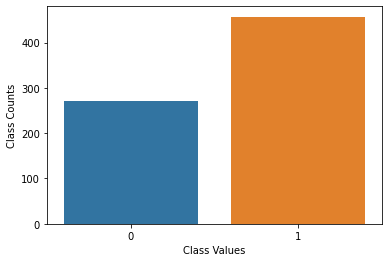

In [14]:
sns.countplot(new_data['Class'].values)
plt.xlabel('Class Values')
plt.ylabel('Class Counts')
plt.show()

In [15]:
index_class=[]
for i in range(100):
    index_class.append(i)

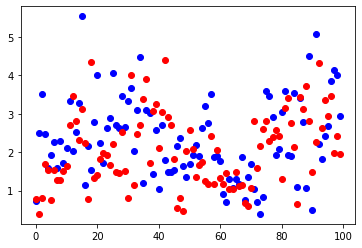

In [16]:
plt.scatter(x=index_class,y=new_data[new_data['Class']==1].f1[:100],color='b')
plt.scatter(x=index_class,y=new_data[new_data['Class']==0].f1[:100],color='r')
plt.show()

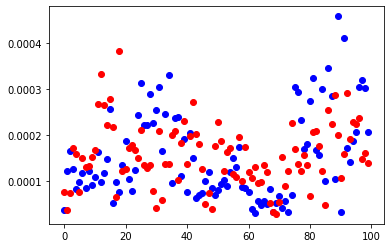

In [17]:
plt.scatter(x=index_class,y=new_data[new_data['Class']==1].f2[:100],color='b')
plt.scatter(x=index_class,y=new_data[new_data['Class']==0].f2[:100],color='r')
plt.show()

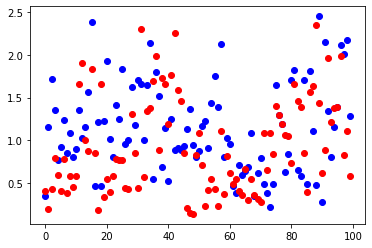

In [18]:
plt.scatter(x=index_class,y=new_data[new_data['Class']==1].f3[:100],color='b')
plt.scatter(x=index_class,y=new_data[new_data['Class']==0].f3[:100],color='r')
plt.show()

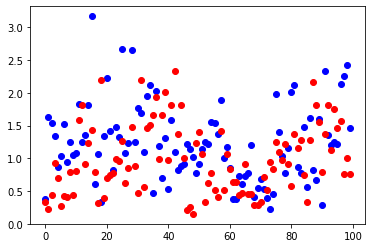

In [19]:
plt.scatter(x=index_class,y=new_data[new_data['Class']==1].f4[:100],color='b')
plt.scatter(x=index_class,y=new_data[new_data['Class']==0].f4[:100],color='r')
plt.show()

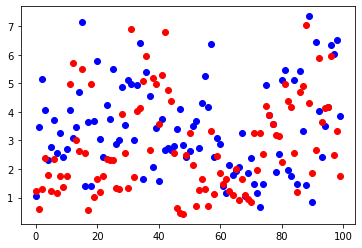

In [20]:
plt.scatter(x=index_class,y=new_data[new_data['Class']==1].f5[:100],color='b')
plt.scatter(x=index_class,y=new_data[new_data['Class']==0].f5[:100],color='r')
plt.show()

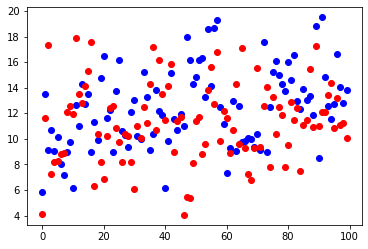

In [21]:
plt.scatter(x=index_class,y=new_data[new_data['Class']==1].f6[:100],color='b')
plt.scatter(x=index_class,y=new_data[new_data['Class']==0].f6[:100],color='r')
plt.show()

In [22]:
new_data.shape

(727, 25)

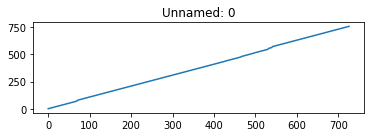

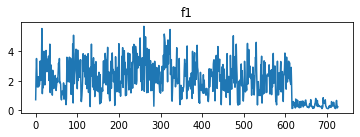

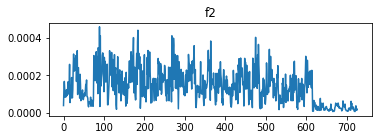

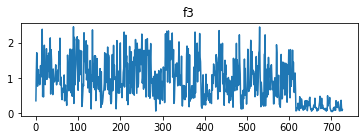

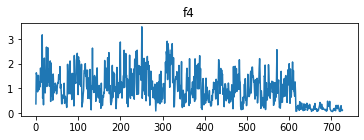

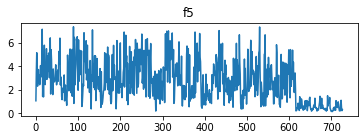

In [23]:
for i, col in enumerate(new_data.iloc[:,0:6].columns.values):
    plt.subplot(6, 2, i+1)
    plt.plot(new_data[col].values.tolist())
    plt.title(col)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(10, 10)
    plt.tight_layout()
    plt.show()

In [24]:
new_data[new_data.Class==1].head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,Class
0,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,195.252,193.289,14.773,159.515,234.505,170.0,169.0,0.005181,0.000403,1
1,2,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,201.997,203.471,10.853,182.713,220.230,94.0,92.0,0.004910,0.000320,1
2,3,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,211.887,208.440,11.499,182.821,225.162,117.0,114.0,0.004757,0.000380,1
3,4,2.470,0.000126,1.358,1.341,4.075,10.696,1.256,5.262,7.076,...,195.952,195.222,4.692,186.593,202.812,74.0,73.0,0.005118,0.000187,1
4,5,1.583,0.000082,0.768,0.864,2.303,9.057,1.070,3.794,5.158,...,195.535,192.316,7.512,177.299,200.638,85.0,84.0,0.005199,0.000245,1


In [25]:
new_data[new_data.Class==0].head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,Class
346,355,0.792,0.000076,0.411,0.333,1.234,4.136,0.391,2.202,2.552,...,103.774,103.862,1.730,98.743,110.597,147.0,146.0,0.009623,0.000203,0
347,356,0.400,0.000038,0.204,0.228,0.613,11.598,1.019,5.521,7.922,...,105.271,105.500,1.083,103.224,108.389,105.0,104.0,0.009478,0.000101,0
348,357,0.813,0.000074,0.434,0.437,1.302,17.380,1.473,8.595,10.105,...,108.954,109.202,1.316,107.359,113.089,62.0,56.0,0.009150,0.000123,0
349,358,1.700,0.000172,0.789,0.929,2.367,7.283,0.723,2.640,3.281,...,100.527,98.816,4.838,87.466,106.806,38.0,37.0,0.010109,0.000494,0
350,359,1.528,0.000159,0.596,0.698,1.789,8.213,0.902,2.992,4.054,...,97.658,96.255,6.928,75.054,107.295,41.0,39.0,0.010419,0.000823,0


In [26]:
new_data.iloc[:,1:5].corr()

,f1,f2,f3,f4
f1,1.000000,0.907353,0.948818,0.924888
f2,0.907353,1.000000,0.838732,0.816680
f3,0.948818,0.838732,1.000000,0.939743
f4,0.924888,0.816680,0.939743,1.000000


In [27]:
new_data.isnull().sum()

Unnamed: 0    0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
f11           0
f12           0
f13           0
f14           0
f15           0
f16           0
f17           0
f18           0
f19           0
f20           0
f21           0
f22           0
f23           0
Class         0
dtype: int64

In [28]:
data=pd.read_csv('ML_Parkinson_son_dataset.csv')

In [29]:
data.shape

(727, 25)

In [30]:
data.Class.value_counts()

1    457
0    270
Name: Class, dtype: int64

In [31]:
dataX=data.drop('Class',axis=1)
dataY=data['Class']

In [32]:
X_train,X_test,y_train,y_test=train_test_split(dataX,dataY,test_size=0.2,random_state=0)

In [33]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (581, 24)
X_test (146, 24)
y_train (581,)
y_test (146,)


In [34]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [35]:
from sklearn.decomposition import PCA
pca=PCA(n_components=19)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [36]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (581, 19)
X_test (146, 19)
y_train (581,)
y_test (146,)


In [37]:
X_train=pd.DataFrame(data=X_train,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19'])
X_test=pd.DataFrame(data=X_test,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19'])
#y_train=pd.DataFrame(data=y_train,columns=['Class'])
#y_test=pd.DataFrame(data=y_test,columns=['Class'])

In [38]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (581, 19)
X_test (146, 19)
y_train (581,)
y_test (146,)


<h1><b>Model Training vs Testing</b></h1>



In [39]:
def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [40]:
def plot_feature_importances(gbm):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), gbm.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [41]:
combine_features_list=[
    ('f1','f2','f3','f4','f5','f6'),
    ('f6','f7','f8','f9','f10','f11'),
    ('f9','f10','f11','f12','f13','f14'),
    ('f15','f16','f17','f18','f19')
]

In [42]:
parameters=[
{
    'penalty':['l1','l2'],
    'C':[0.1,0.4,0.5],
    'random_state':[0]
    },
]

for features in combine_features_list:
    print(features)
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
    
    gslog=GridSearchCV(LogisticRegression(),parameters,scoring='accuracy')
    gslog.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gslog.best_params_)
    print()
    predictions=[
    (gslog.predict(X_train_set),y_train,'Train'),
    (gslog.predict(X_test_set),y_test,'Test1'),
    ]
    
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1],pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)

    print("*"*50)    
    basari=cross_val_score(estimator=LogisticRegression(),X=X_train,y=y_train,cv=5)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

('f1', 'f2', 'f3', 'f4', 'f5', 'f6')
**************************************************
Best parameters set:
{'C': 0.1, 'penalty': 'l1', 'random_state': 0}

Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       211
           1       0.83      0.87      0.85       370

    accuracy                           0.81       581
   macro avg       0.80      0.78      0.79       581
weighted avg       0.81      0.81      0.81       581

**************************************************
Train Confusion Matrix:
[[147  64]
 [ 47 323]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.79      0.63      0.70        59
           1       0.78      0.89      0.83        87

    accuracy                           0.78

C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to

0.846743295019157
0.03445614128085239
**************************************************
('f9', 'f10', 'f11', 'f12', 'f13', 'f14')
**************************************************
Best parameters set:
{'C': 0.4, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.61      0.16      0.25       211
           1       0.66      0.94      0.78       370

    accuracy                           0.66       581
   macro avg       0.64      0.55      0.51       581
weighted avg       0.64      0.66      0.59       581

**************************************************
Train Confusion Matrix:
[[ 33 178]
 [ 21 349]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.60      0.10      0.17        59
    

C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


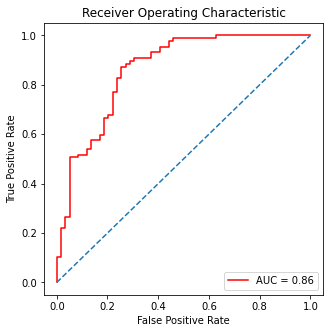

Accuracy : 0.815068493150685
Logistic TRAIN score with  0.8382099827882961
Logistic TEST score with  0.815068493150685

[[40 19]
 [ 8 79]]


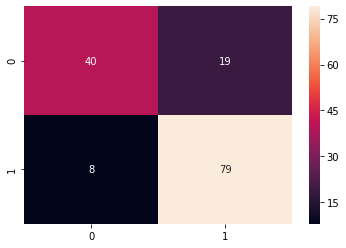

In [43]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=0.1,penalty='l1',random_state=0)
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)


y_proba=lr.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)


from sklearn.metrics import r2_score,accuracy_score

print('Accuracy :',accuracy_score(y_test, y_pred))
print("Logistic TRAIN score with ",format(lr.score(X_train, y_train)))
print("Logistic TEST score with ",format(lr.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

<table border=5>
<tr>
<th>Özellikler</th>
<th>Parametreler</th>
<th>Train Set</th>
<th>Test Set</th>
</tr>
<tr>
<td>(f1', 'f2', 'f3', 'f4', 'f5', 'f6')</td>
<td>{'C': 0.1, 'penalty': 'l1', 'random_state': 0}</td>
<td>% 81</td>
<td>% 78</td>
</tr>

<tr>
<td>('f6', 'f7', 'f8', 'f9', 'f10', 'f11')</td>
<td>{'C': 0.5, 'penalty': 'l2', 'random_state': 0}</td>
<td>% 80</td>
<td>% 77</td>
</tr>

<tr>
<td>('f9', 'f10', 'f11', 'f12', 'f13', 'f14')</td>
<td>{'C': 0.4, 'penalty': 'l2', 'random_state': 0}</td>
<td>% 64</td>
<td>% 61</td>
</tr>

<tr>
<td>('f15', 'f16', 'f17', 'f18', 'f19')</td>
<td>{'C': 0.1, 'penalty': 'l1', 'random_state': 0}</td>
<td>% 41</td>
<td>% 36</td>
</tr>

</table>

In [44]:
parameters=[
{
    'n_neighbors':np.arange(2,33),
    'n_jobs':[2,6]
    },
]
print("*"*50)
for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
   
    gsknn=GridSearchCV(KNeighborsClassifier(),parameters,scoring='accuracy')
    gsknn.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gsknn.best_params_)
    print("*"*50)
    predictions = [
    (gsknn.predict(X_train_set), y_train, 'Train'),
    (gsknn.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=KNeighborsClassifier(),X=X_train,y=y_train,cv=5)
    print(basari.mean())
    print(basari.std())
    print("*"*50) 

**************************************************
**************************************************


C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set:
{'n_jobs': 2, 'n_neighbors': 22}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       211
           1       0.89      0.94      0.91       370

    accuracy                           0.88       581
   macro avg       0.88      0.86      0.87       581
weighted avg       0.88      0.88      0.88       581

**************************************************
Train Confusion Matrix:
[[167  44]
 [ 23 347]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        59
           1       0.87      0.92      0.89        87

    accuracy                           0.87       146
   macro avg       0.87      0.86      0.

C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set:
{'n_jobs': 2, 'n_neighbors': 12}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       211
           1       0.89      0.92      0.91       370

    accuracy                           0.88       581
   macro avg       0.87      0.86      0.87       581
weighted avg       0.88      0.88      0.88       581

**************************************************
Train Confusion Matrix:
[[170  41]
 [ 30 340]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.90      0.76      0.83        59
           1       0.85      0.94      0.90        87

    accuracy                           0.87       146
   macro avg       0.88      0.85      0.

C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set:
{'n_jobs': 2, 'n_neighbors': 12}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.61      0.47      0.53       211
           1       0.73      0.83      0.78       370

    accuracy                           0.70       581
   macro avg       0.67      0.65      0.66       581
weighted avg       0.69      0.70      0.69       581

**************************************************
Train Confusion Matrix:
[[100 111]
 [ 63 307]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.46      0.27      0.34        59
           1       0.61      0.78      0.69        87

    accuracy                           0.58       146
   macro avg       0.53      0.53      0.

C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set:
{'n_jobs': 2, 'n_neighbors': 3}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       211
           1       0.81      0.91      0.86       370

    accuracy                           0.81       581
   macro avg       0.80      0.77      0.78       581
weighted avg       0.80      0.81      0.80       581

**************************************************
Train Confusion Matrix:
[[131  80]
 [ 33 337]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.55      0.46      0.50        59
           1       0.67      0.75      0.71        87

    accuracy                           0.63       146
   macro avg       0.61      0.60      0.6

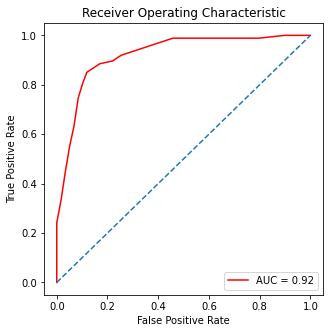

Accuracy: 0.8493150684931506
KNN TRAIN score with  0.8846815834767642
KNN TEST score with  0.8493150684931506

[[46 13]
 [ 9 78]]


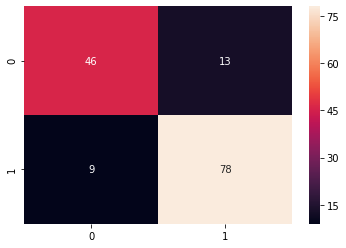

In [45]:
knn=KNeighborsClassifier(n_jobs=2, n_neighbors=22)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

y_proba=knn.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accuracy:',accuracy_score(y_test, y_pred))
print("KNN TRAIN score with ",format(knn.score(X_train, y_train)))
print("KNN TEST score with ",format(knn.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

<table border=2>
<tr>
<th>Özellikler</th>
<th>Parametreler</th>
<th>Train Set</th>
<th>Test Set</th>
</tr>
<tr>
<td>(f1', 'f2', 'f3', 'f4', 'f5', 'f6')</td>
<td>{'n_jobs': 2, 'n_neighbors': 22}</td>
<td>% 88</td>
<td>% 87</td>
</tr>

<tr>
<td>('f6', 'f7', 'f8', 'f9', 'f10', 'f11')</td>
<td>{'n_jobs': 2, 'n_neighbors': 12}</td>
<td>% 88</td>
<td>% 87</td>
</tr>

<tr>
<td>('f9', 'f10', 'f11', 'f12', 'f13', 'f14')</td>
<td>{'n_jobs': 2, 'n_neighbors': 12}</td>
<td>% 69</td>
<td>% 55</td>
</tr>

<tr>
<td>('f15', 'f16', 'f17', 'f18', 'f19')</td>
<td>{'n_jobs': 2, 'n_neighbors': 3}</td>
<td>% 80</td>
<td>% 62</td>
</tr>

</table>

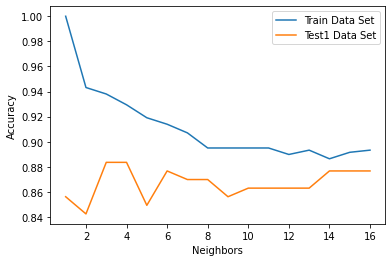

In [46]:
n_neighbors = range(1, 17)
train_data_accuracy = []
test1_data_accuracy = []
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    knn.fit(X_train, y_train)
    train_data_accuracy.append(knn.score(X_train, y_train))
    test1_data_accuracy.append(knn.score(X_test, y_test))
plt.plot(n_neighbors, train_data_accuracy, label="Train Data Set")
plt.plot(n_neighbors, test1_data_accuracy, label="Test1 Data Set")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

In [47]:
n_neighbors = range(1, 17)
k_scores=[]
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    scores=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=12)
    k_scores.append(scores.mean())
print(k_scores)

[0.8312142676219424, 0.8383403893472283, 0.8333107179041828, 0.8364964780238336, 0.8364979857191104, 0.8416369650697159, 0.8450722487576591, 0.8433007068075457, 0.8586791986298067, 0.8639953321754236, 0.8519842777536547, 0.8554210691368747, 0.8519827700583781, 0.857229549621267, 0.865876182033097, 0.8537558197037681]


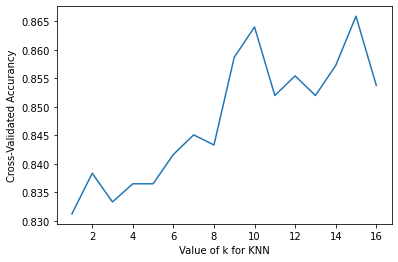

In [48]:
plt.plot(n_neighbors,k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel("Cross-Validated Accurancy")
plt.show()

In [49]:
parameters = [
    {
        'kernel': ['linear'],
        'random_state': [2]
    },
    {
        'kernel': ['rbf'],
        'gamma':[0.9,0.06,0.3],
        'random_state': [0],
        'C':[1,2,3,4,5,6],
        'degree':[2],
        'probability':[True]
    },
]

for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
  
    svc = GridSearchCV(SVC(), parameters,
    scoring='accuracy')
    svc.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(svc.best_params_)
    print("*"*50)
    predictions = [
    (svc.predict(X_train_set), y_train, 'Train'),
    (svc.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=SVC(),X=X_train,y=y_train,cv=5)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************


C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set:
{'C': 5, 'degree': 2, 'gamma': 0.06, 'kernel': 'rbf', 'probability': True, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       211
           1       0.97      0.98      0.98       370

    accuracy                           0.97       581
   macro avg       0.97      0.96      0.97       581
weighted avg       0.97      0.97      0.97       581

**************************************************
Train Confusion Matrix:
[[199  12]
 [  6 364]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        59
           1       0.92      0.94      0.93        87

    accuracy                      

C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Best parameters set:
{'C': 3, 'degree': 2, 'gamma': 0.9, 'kernel': 'rbf', 'probability': True, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       211
           1       0.93      0.96      0.95       370

    accuracy                           0.93       581
   macro avg       0.93      0.92      0.92       581
weighted avg       0.93      0.93      0.93       581

**************************************************
Train Confusion Matrix:
[[184  27]
 [ 13 357]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.88      0.71      0.79        59
           1       0.83      0.93      0.88        87

    accuracy                       

C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Best parameters set:
{'C': 1, 'degree': 2, 'gamma': 0.9, 'kernel': 'rbf', 'probability': True, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.91      0.14      0.24       211
           1       0.67      0.99      0.80       370

    accuracy                           0.68       581
   macro avg       0.79      0.56      0.52       581
weighted avg       0.75      0.68      0.60       581

**************************************************
Train Confusion Matrix:
[[ 29 182]
 [  3 367]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.46      0.10      0.17        59
           1       0.60      0.92      0.73        87

    accuracy                       

C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Best parameters set:
{'kernel': 'linear', 'random_state': 2}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       211
           1       0.64      1.00      0.78       370

    accuracy                           0.64       581
   macro avg       0.32      0.50      0.39       581
weighted avg       0.41      0.64      0.50       581

**************************************************
Train Confusion Matrix:
[[  0 211]
 [  0 370]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.60      1.00      0.75        87

    accuracy                           0.60       146
   macro avg       0.30      0.50 

C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to

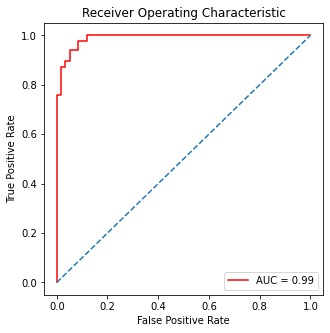

Accuracy : 0.9383561643835616
SVC TRAIN score with  0.9948364888123924
SVC TEST score with  0.9383561643835616

[[52  7]
 [ 2 85]]


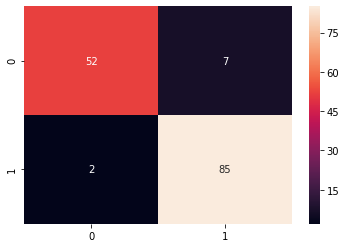

In [50]:
svc=SVC(C=5,degree=2,gamma=0.06,kernel='rbf',probability=True,random_state=0)
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

y_proba=svc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accuracy :',accuracy_score(y_test, y_pred))
print("SVC TRAIN score with ",format(svc.score(X_train, y_train)))
print("SVC TEST score with ",format(svc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

<table border=2>
<tr>
<th>Özellikler</th>
<th>Parametreler</th>
<th>Train Set</th>
<th>Test Set</th>
</tr>
<tr>
<td>(f1', 'f2', 'f3', 'f4', 'f5', 'f6')</td>
<td>{'C': 5, 'degree': 2, 'gamma': 0.06, 'kernel': 'rbf', 'probability': True, 'random_state': 0}</td>
<td>% 97</td>
<td>% 92</td>
</tr>

<tr>
<td>('f6', 'f7', 'f8', 'f9', 'f10', 'f11')</td>
<td>{'C': 3, 'degree': 2, 'gamma': 0.9, 'kernel': 'rbf', 'probability': True, 'random_state': 0}</td>
<td>% 93</td>
<td>% 85</td>
</tr>

<tr>
<td>('f9', 'f10', 'f11', 'f12', 'f13', 'f14')</td>
<td>{'C': 1, 'degree': 2, 'gamma': 0.9, 'kernel': 'rbf', 'probability': True, 'random_state': 0}</td>
<td>% 75</td>
<td>% 54</td>
</tr>

<tr>
<td>('f15', 'f16', 'f17', 'f18', 'f19')</td>
<td>{'kernel': 'linear', 'random_state': 2}</td>
<td>% 41</td>
<td>% 36</td>
</tr>

</table>

In [51]:
parameters = [
{
    'learning_rate': [0.01, 0.02, 0.002],
    'random_state': [0],
    'n_estimators': np.arange(3, 20)
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
   
    gbc = GridSearchCV(GradientBoostingClassifier(), parameters, scoring='accuracy')
    gbc.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(gbc.best_params_)
    print("*"*50)
    predictions = [
    (gbc.predict(X_train_set), y_train, 'Train'),
    (gbc.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=GradientBoostingClassifier(),X=X_train,y=y_train,cv=5)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************


C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set:
{'learning_rate': 0.02, 'n_estimators': 18, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.92      0.54      0.68       211
           1       0.79      0.97      0.87       370

    accuracy                           0.81       581
   macro avg       0.85      0.75      0.77       581
weighted avg       0.83      0.81      0.80       581

**************************************************
Train Confusion Matrix:
[[113  98]
 [ 10 360]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.92      0.41      0.56        59
           1       0.71      0.98      0.82        87

    accuracy                           0.75       146
   macro av

C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set:
{'learning_rate': 0.02, 'n_estimators': 19, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.98      0.23      0.37       211
           1       0.69      1.00      0.82       370

    accuracy                           0.72       581
   macro avg       0.84      0.61      0.59       581
weighted avg       0.80      0.72      0.66       581

**************************************************
Train Confusion Matrix:
[[ 48 163]
 [  1 369]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.93      0.24      0.38        59
           1       0.66      0.99      0.79        87

    accuracy                           0.68       146
   macro av

C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set:
{'learning_rate': 0.02, 'n_estimators': 19, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       1.00      0.02      0.04       211
           1       0.64      1.00      0.78       370

    accuracy                           0.64       581
   macro avg       0.82      0.51      0.41       581
weighted avg       0.77      0.64      0.51       581

**************************************************
Train Confusion Matrix:
[[  4 207]
 [  0 370]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.50      0.02      0.03        59
           1       0.60      0.99      0.74        87

    accuracy                           0.60       146
   macro av

C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set:
{'learning_rate': 0.02, 'n_estimators': 14, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       211
           1       0.64      1.00      0.78       370

    accuracy                           0.64       581
   macro avg       0.32      0.50      0.39       581
weighted avg       0.41      0.64      0.50       581

**************************************************
Train Confusion Matrix:
[[  0 211]
 [  0 370]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.60      1.00      0.75        87

    accuracy                           0.60       146
   macro av

C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.9190834070144416
0.017832618354038595
**************************************************


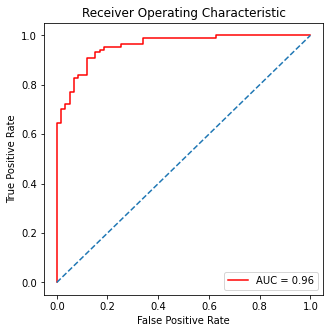

Accuracy : 0.8835616438356164
GradientBoostingClassifier TRAIN score with  0.9655765920826161
GradientBoostingClassifier TEST score with  0.8835616438356164

[[46 13]
 [ 4 83]]


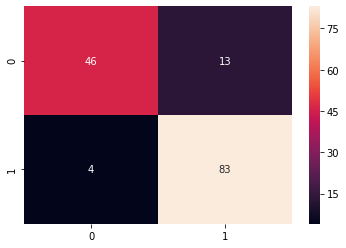

In [52]:
gbc=GradientBoostingClassifier(learning_rate=0.02,n_estimators=100,random_state=0)
gbc.fit(X_train,y_train)

y_pred=gbc.predict(X_test)

y_proba=gbc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accuracy :',accuracy_score(y_test, y_pred))
print("GradientBoostingClassifier TRAIN score with ",format(gbc.score(X_train, y_train)))
print("GradientBoostingClassifier TEST score with ",format(gbc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

<table border=2>
<tr>
<th>Özellikler</th>
<th>Parametreler</th>
<th>Train Set</th>
<th>Test Set</th>
</tr>
<tr>
<td>(f1', 'f2', 'f3', 'f4', 'f5', 'f6')</td>
<td>{'learning_rate': 0.02, 'n_estimators': 18, 'random_state': 0}</td>
<td>% 83</td>
<td>% 80</td>
</tr>

<tr>
<td>('f6', 'f7', 'f8', 'f9', 'f10', 'f11')</td>
<td>{'learning_rate': 0.02, 'n_estimators': 19, 'random_state': 0}</td>
<td>% 80</td>
<td>% 77</td>
</tr>

<tr>
<td>('f9', 'f10', 'f11', 'f12', 'f13', 'f14')</td>
<td>{'learning_rate': 0.02, 'n_estimators': 19, 'random_state': 0}</td>
<td>% 77</td>
<td>% 56</td>
</tr>

<tr>
<td>('f15', 'f16', 'f17', 'f18', 'f19')</td>
<td>{'learning_rate': 0.02, 'n_estimators': 14, 'random_state': 0}</td>
<td>% 41</td>
<td>% 36</td>
</tr>

</table>

In [54]:
parameters = [
    {
        'max_depth': np.arange(1, 10),
        'min_samples_split': np.arange(2, 5),
        'random_state': [3],
        'n_estimators': np.arange(10, 20)
    },
]

for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    tree=GridSearchCV(RandomForestClassifier(),parameters,scoring='accuracy')
    tree.fit(X_train_set, y_train)
    
    print('Best parameters set:')
    print(tree.best_params_)
    print("*"*50)
    predictions = [
        (tree.predict(X_train_set), y_train, 'Train'),
        (tree.predict(X_test1_set), y_test, 'Test1')
    ]
    
    for pred in predictions:
        
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
    
    print("*"*50)    
    basari=cross_val_score(estimator=RandomForestClassifier(),X=X_train,y=y_train,cv=5)
    print(basari.mean())
    print(basari.std())
    print("*"*50)
   
   
    

**************************************************


C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22."

Best parameters set:
{'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 19, 'random_state': 3}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       211
           1       0.99      0.97      0.98       370

    accuracy                           0.98       581
   macro avg       0.97      0.98      0.97       581
weighted avg       0.98      0.98      0.98       581

**************************************************
Train Confusion Matrix:
[[208   3]
 [ 11 359]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.90      0.76      0.83        59
           1       0.85      0.94      0.90        87

    accuracy                           0.87     

C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Us

Best parameters set:
{'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 18, 'random_state': 3}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       211
           1       0.97      0.99      0.98       370

    accuracy                           0.97       581
   macro avg       0.97      0.97      0.97       581
weighted avg       0.97      0.97      0.97       581

**************************************************
Train Confusion Matrix:
[[200  11]
 [  5 365]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.89      0.69      0.78        59
           1       0.82      0.94      0.88        87

    accuracy                           0.84     

C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Best parameters set:
{'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 11, 'random_state': 3}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.82      0.38      0.52       211
           1       0.73      0.95      0.83       370

    accuracy                           0.75       581
   macro avg       0.78      0.67      0.67       581
weighted avg       0.76      0.75      0.72       581

**************************************************
Train Confusion Matrix:
[[ 80 131]
 [ 17 353]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.27      0.05      0.09        59
           1       0.59      0.91      0.71        87

    accuracy                           0.56     

C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Us

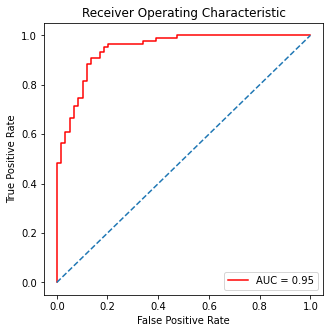

Accuracy: 0.8972602739726028
RandomForestClassifier TRAIN score with  0.9965576592082617
RandomForestClassifier TEST score with  0.8972602739726028

[[47 12]
 [ 3 84]]


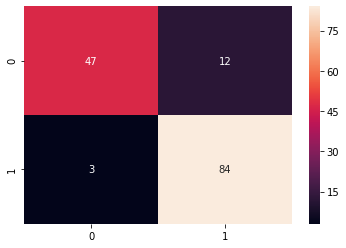

In [55]:
rfc=RandomForestClassifier(max_depth=7,min_samples_split=4,n_estimators=19,random_state=3)
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

y_proba=rfc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score
print('Accuracy:',accuracy_score(y_test, y_pred))
print("RandomForestClassifier TRAIN score with ",format(rfc.score(X_train, y_train)))
print("RandomForestClassifier TEST score with ",format(rfc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [56]:
for i in range(1,11):
    rf = RandomForestClassifier(n_estimators=i, random_state = 3, max_depth=7)
    rf.fit(X_train, y_train)
    print("TEST set score w/ " +str(i)+" estimators: {:.5}".format(rf.score(X_test, y_test)))

TEST set score w/ 1 estimators: 0.79452
TEST set score w/ 2 estimators: 0.79452
TEST set score w/ 3 estimators: 0.84247
TEST set score w/ 4 estimators: 0.87671
TEST set score w/ 5 estimators: 0.87671
TEST set score w/ 6 estimators: 0.88356
TEST set score w/ 7 estimators: 0.87671
TEST set score w/ 8 estimators: 0.89726
TEST set score w/ 9 estimators: 0.89041
TEST set score w/ 10 estimators: 0.89041


<table border=2>
<tr>
<th>Özellikler</th>
<th>Parametreler</th>
<th>Train Set</th>
<th>Test Set</th>
</tr>
<tr>
<td>(f1', 'f2', 'f3', 'f4', 'f5', 'f6')</td>
<td>{'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 19, 'random_state': 3}</td>
<td>% 98</td>
<td>% 87</td>
</tr>

<tr>
<td>('f6', 'f7', 'f8', 'f9', 'f10', 'f11')</td>
<td>{'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 18, 'random_state': 3}</td>
<td>% 97</td>
<td>% 85</td>
</tr>

<tr>
<td>('f9', 'f10', 'f11', 'f12', 'f13', 'f14')</td>
<td>{'max_depth': 8, 'min_samples_split': 4, 'n_estimators': 12, 'random_state': 3}</td>
<td>% 89</td>
<td>% 57</td>
</tr>

<tr>
<td>('f15', 'f16', 'f17', 'f18', 'f19')</td>
<td>{'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 11, 'random_state': 3}</td>
<td>% 76</td>
<td>% 46</td>
</tr>

</table>

In [58]:
parameters = [
    {
        
        'random_state': [0],
      
    },
]

for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    dt=GridSearchCV(DecisionTreeClassifier(),parameters,scoring='accuracy')
    dt.fit(X_train_set, y_train)
    
    print('Best parameters set:')
    print(tree.best_params_)
    print("*"*50)
    predictions = [
        (dt.predict(X_train_set), y_train, 'Train'),
        (dt.predict(X_test1_set), y_test, 'Test1')
    ]
    
    for pred in predictions:
        
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
    
    print("*"*50)    
    basari=cross_val_score(estimator=DecisionTreeClassifier(),X=X_train,y=y_train,cv=5)
    print(basari.mean())
    print(basari.std())
    print("*"*50)
   
   

**************************************************
Best parameters set:
{'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 11, 'random_state': 3}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00       370

    accuracy                           1.00       581
   macro avg       1.00      1.00      1.00       581
weighted avg       1.00      1.00      1.00       581

**************************************************
Train Confusion Matrix:
[[211   0]
 [  0 370]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.90      0.73      0.80        59
           1       0.84      0.94      0.89        8

C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\cmiri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

0.8847627468317125
0.031651503668719085
**************************************************


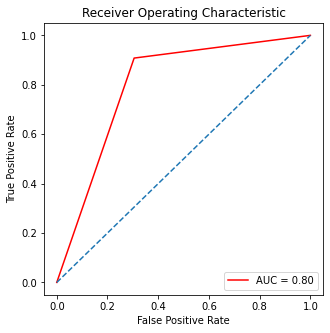

Accuracy: 0.821917808219178
DecisionTreeClassifier TRAIN score with  0.9965576592082617
DecisionTreeClassifier TEST score with  0.8972602739726028

[[41 18]
 [ 8 79]]


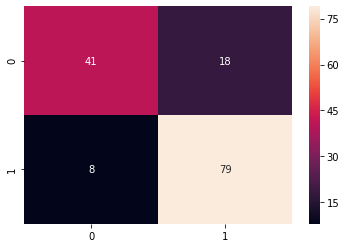

In [59]:
dt=DecisionTreeClassifier(random_state=3)
dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)

y_proba=dt.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score
print('Accuracy:',accuracy_score(y_test, y_pred))
print("DecisionTreeClassifier TRAIN score with ",format(rfc.score(X_train, y_train)))
print("DecisionTreeClassifier TEST score with ",format(rfc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [60]:
for i in range(1,11):
    rf = DecisionTreeClassifier(random_state = 3)
    rf.fit(X_train, y_train)
    print("TEST set score w/ " +str(i)+" estimators: {:.5}".format(rf.score(X_test, y_test)))

TEST set score w/ 1 estimators: 0.82192
TEST set score w/ 2 estimators: 0.82192
TEST set score w/ 3 estimators: 0.82192
TEST set score w/ 4 estimators: 0.82192
TEST set score w/ 5 estimators: 0.82192
TEST set score w/ 6 estimators: 0.82192
TEST set score w/ 7 estimators: 0.82192
TEST set score w/ 8 estimators: 0.82192
TEST set score w/ 9 estimators: 0.82192
TEST set score w/ 10 estimators: 0.82192
